In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from src import utils_pca
from graphviz import Source

In [2]:
medal_by_country = pd.read_csv('data/medal_by_country_coor.csv')
data_short = pd.read_csv('data/athlete_cleaned_short.csv')
medal_by_country

,country,gold,silver,bronze,total,longitude,latitude,class
0,FR Germany,289,218,198,1501,10.451526,51.165691,1
1,Sweden,190,205,143,1123,18.643501,60.128161,1
2,Belgium,79,73,70,453,4.469936,50.503887,1
3,Great Britain,439,502,483,2804,-3.435973,55.378051,1
4,Netherlands,189,239,237,1282,5.291266,52.132633,1
...,...,...,...,...,...,...,...,...
110,Syria,0,0,1,1,38.996815,34.802075,4
111,Kazakhstan,1,1,0,5,66.923684,48.019573,4
112,Faroe Islands,1,7,5,22,-6.911806,61.892635,4
113,Peru,2,1,2,10,-75.015152,-9.189967,4


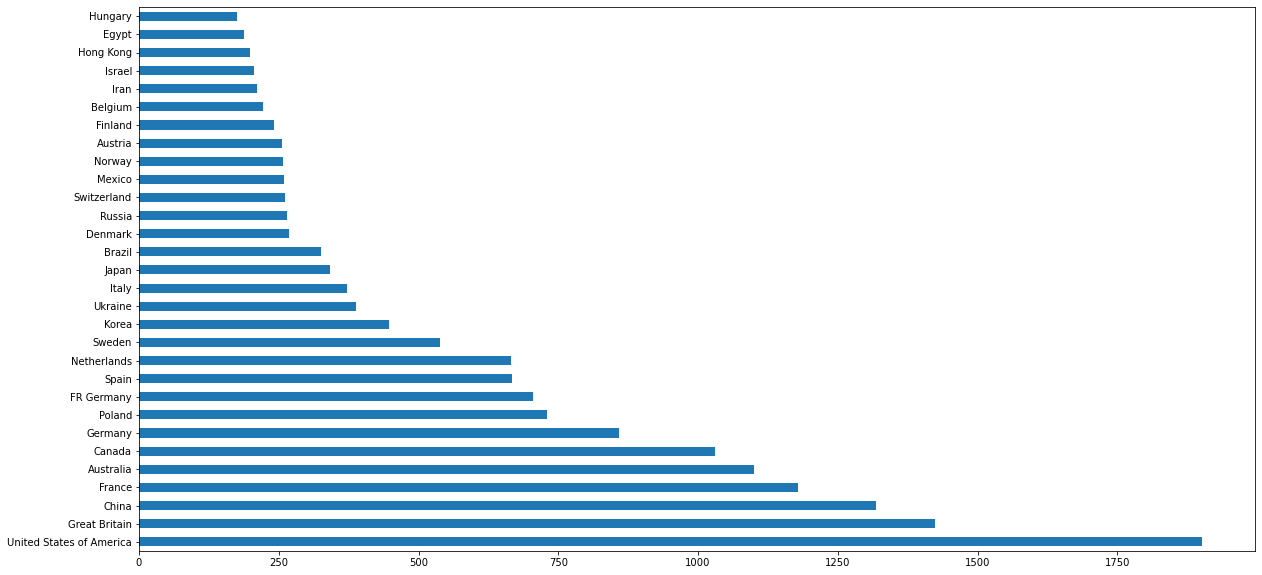

In [3]:
data_short['country'].value_counts().head(30).plot(kind='barh', figsize=(20,10))
plt.savefig("images/top30_country")

In [4]:
data = pd.DataFrame()
data["class"] = medal_by_country["class"]
data["gold"] = medal_by_country["gold"]
data["silver"] = medal_by_country["silver"]
data["bronze"] = medal_by_country["bronze"]
data["total"] = medal_by_country["total"]
data = data.astype({"class": str}, errors='raise') 

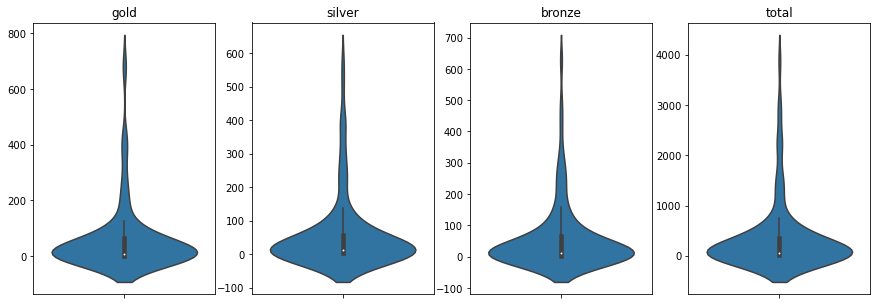

In [5]:
cols = ['gold','silver', 'bronze', 'total']
fig1, axes1 = plt.subplots(ncols=len(cols), nrows=1,figsize=(15,5))
for i in range(len(cols)):
    sns.violinplot(y=data[cols[i]],ax=axes1[i]).set(ylabel=None,title=cols[i])
plt.savefig("images/violinplot_medal_by_type_and_class")

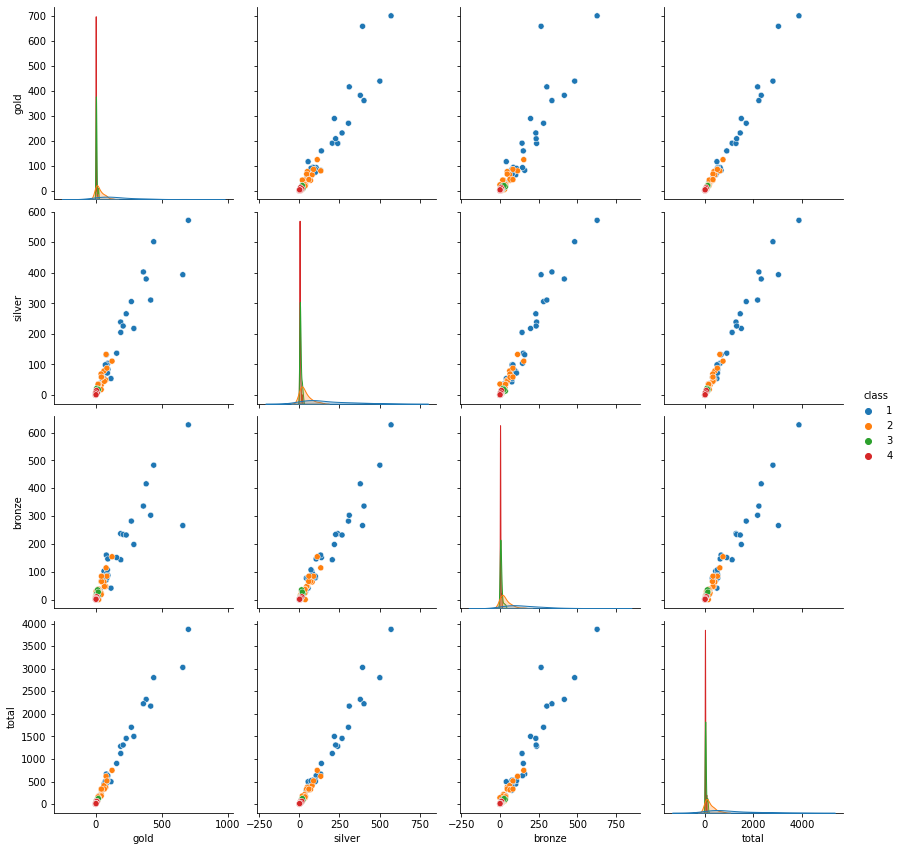

In [6]:
sns_plot = sns.pairplot(data,height=3, hue='class')
sns_plot.savefig("images/medals_by_class_2.png")

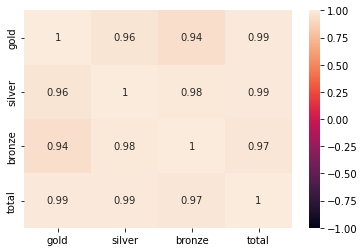

In [7]:
corr = data.corr()
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)
plt.savefig("images/heatmap_medal_by_class")

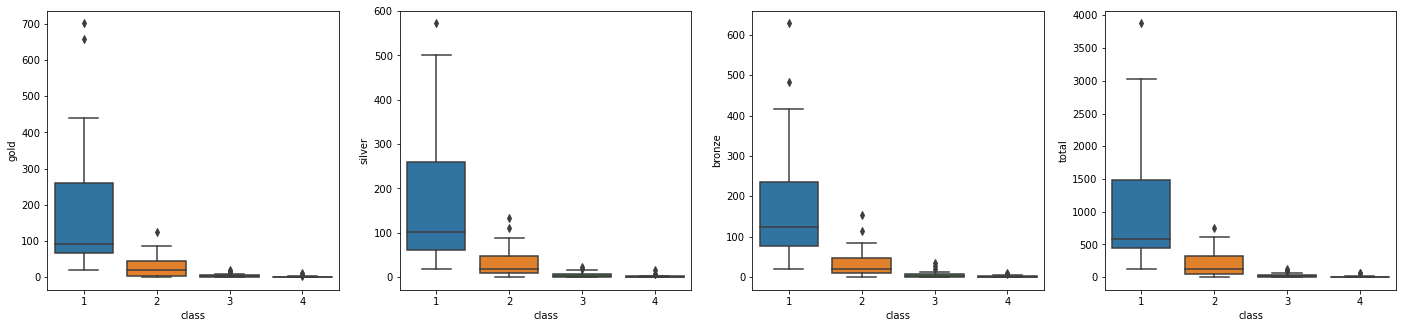

In [8]:
cols1 = ["class"]
cols2 = ['gold','silver', 'bronze', 'total']
fig4, axes4 = plt.subplots(ncols=len(cols2), nrows=1,figsize=(20,5))
fig4.tight_layout(pad=3.0)
hue = "class"
i = 0
for j in range(len(cols2)):
    if cols1[i] != hue and hue:
        p = sns.boxplot(x=data[cols1[i]],y=data[cols2[j]],ax=axes4[j],hue=data[hue])
    else:
        p = sns.boxplot(x=data[cols1[i]],y=data[cols2[j]],ax=axes4[j])
plt.savefig("images/boxplot_medal_by_class")

## PCA

In [9]:
features = ['gold', 'silver', 'bronze', 'total']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['class']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [11]:
finalDf = pd.concat([principalDf, data[['class']]], axis = 1)
finalDf

,principal component 1,principal component 2,class
0,3.256481,0.417265,1
1,2.240906,0.116740,1
2,0.310271,0.032362,1
3,7.552810,-0.759651,1
4,2.965962,-0.510807,1
...,...,...,...
110,-1.028048,0.042392,4
111,-1.021005,0.053459,4
112,-0.956069,0.013857,4
113,-1.003567,0.047978,4


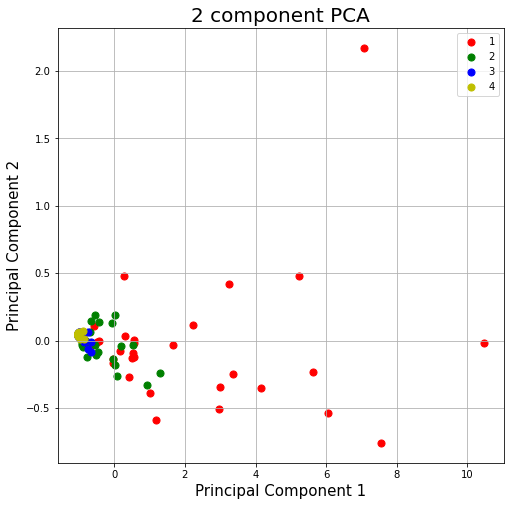

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['1', '2', '3','4']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.savefig("images/pca_medal_by_class")

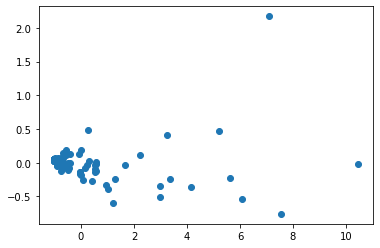

In [13]:
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'])
plt.rcParams['figure.figsize'] = (8, 6)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


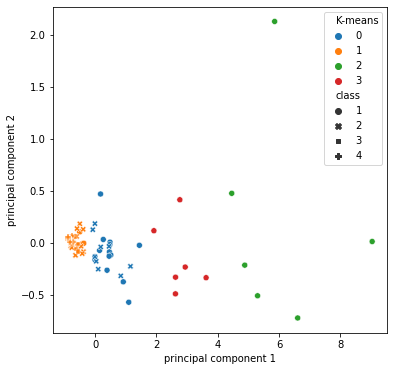

In [31]:
x = finalDf.iloc[:,0:2]
plt.rcParams["figure.figsize"] = (6,6)
cls = KMeans(n_clusters=4, init="random")
cls.fit(x)
labels_country = pd.Series(cls.labels_, name="K-means")
utils_pca.scatterplot_pca(data=x, hue=labels_country, style=finalDf["class"])
plt.savefig("images/kmean_n=4_medal_by_class")

# Extra Graph

In [15]:
gold_by_class = [0,0,0,0]
silver_by_class = [0,0,0,0]
bronze_by_class = [0,0,0,0]
for i in range(115):
    if i <= 29:
        gold_by_class[0] += medal_by_country["gold"][i]
        silver_by_class[0] += medal_by_country["silver"][i]
        bronze_by_class[0] += medal_by_country["bronze"][i]
    elif i<=59:
        gold_by_class[1] += medal_by_country["gold"][i]
        silver_by_class[1] += medal_by_country["silver"][i]
        bronze_by_class[1] += medal_by_country["bronze"][i]
    elif i<=89:
        gold_by_class[2] += medal_by_country["gold"][i]
        silver_by_class[2] += medal_by_country["silver"][i]
        bronze_by_class[3] += medal_by_country["bronze"][i]
    else:
        gold_by_class[3] += medal_by_country["gold"][i]
        silver_by_class[3] += medal_by_country["silver"][i]
        bronze_by_class[3] += medal_by_country["bronze"][i]

In [16]:
df_pie = pd.DataFrame({'gold': gold_by_class,
                   'silver': gold_by_class,
                  'bronze': gold_by_class,},
                  index=['1', '2', '3','4'])

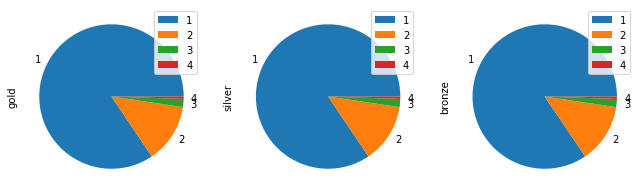

In [17]:
plot = df_pie.plot.pie(subplots=True, figsize=(11, 6))
plt.savefig("images/circleplot_medal_by_type_and_class")

In [18]:
medal_by_sport = pd.read_csv('data/medal_by_sport.csv')
medal_by_sport

,type,gold,silver,bronze,total
0,Archery,140,139,136,834
1,Athletics,2613,2588,2512,15527
2,Basketball,195,192,207,1176
3,Fencing,222,228,220,1342
4,Powerlifting,136,136,131,811
5,Rugby,56,60,60,348
6,Swimming,2119,2068,2033,12526
7,Table Tennis,463,439,491,2758
8,Wheelchair Tennis,454,430,486,2708
9,Triathlon,6,6,6,36


In [19]:
df_pie = pd.DataFrame({'gold': medal_by_sport["gold"].tolist(),
                   'silver': medal_by_sport["silver"].tolist(),
                  'bronze': medal_by_sport["bronze"].tolist(),
                    'total': medal_by_sport['total'].tolist(),
                      'type':medal_by_sport["type"]},
                  )

df_pie

,gold,silver,bronze,total,type
0,140,139,136,834,Archery
1,2613,2588,2512,15527,Athletics
2,195,192,207,1176,Basketball
3,222,228,220,1342,Fencing
4,136,136,131,811,Powerlifting
5,56,60,60,348,Rugby
6,2119,2068,2033,12526,Swimming
7,463,439,491,2758,Table Tennis
8,454,430,486,2708,Wheelchair Tennis
9,6,6,6,36,Triathlon


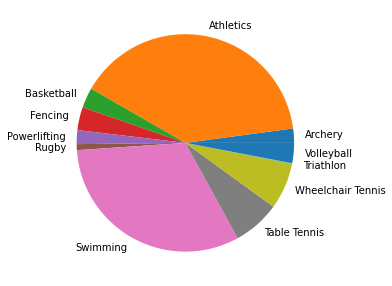

In [20]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.pie(df_pie["total"], labels = df_pie["type"])
plt.savefig("new images/circleplot_medal_by_sport")

In [21]:
data_short = pd.read_csv('data/athlete_cleaned_short.csv')
data_short

,gender,medal,type,year,country,abb
0,Men,Gold,Archery,1980,Denmark,DEN
1,Men,Gold,Archery,1980,FR Germany,FRG
2,Men,Gold,Archery,1980,Canada,CAN
3,Men,Gold,Archery,1980,Mexico,MEX
4,Men,Gold,Archery,1980,Finland,FIN
...,...,...,...,...,...,...
19542,Women,Bronze,Volleyball,2016,Brazil,BRA
19543,Women,Bronze,Volleyball,2016,Brazil,BRA
19544,Women,Bronze,Volleyball,2016,Brazil,BRA
19545,Women,Bronze,Volleyball,2016,Brazil,BRA


In [22]:
gold_by_gender = [0,0,0,0]
silver_by_gender = [0,0,0,0]
bronze_by_gender = [0,0,0,0]
total_by_gender = [0,0,0,0]
for i in range(19546):
    if data_short["gender"][i] == "Men":
        if data_short["medal"][i] == "Gold":
            gold_by_gender[0] += 1
            total_by_gender[0] += 3
        elif data_short["medal"][i] == "Silver":
            silver_by_gender[0] += 1
            total_by_gender[0] += 2
        elif data_short["medal"][i] == "Bronze":
            bronze_by_gender[0] += 1
            total_by_gender[0] += 1
    elif data_short["gender"][i] == "Women":
        if data_short["medal"][i] == "Gold":
            gold_by_gender[1] += 1
            total_by_gender[1] += 3
        elif data_short["medal"][i] == "Silver":
            silver_by_gender[1] += 1
            total_by_gender[1] += 2
        elif data_short["medal"][i] == "Bronze":
            bronze_by_gender[1] += 1
            total_by_gender[1] += 1
    elif data_short["gender"][i] == "Mixed":
        if data_short["medal"][i] == "Gold":
            gold_by_gender[2] += 1
            total_by_gender[2] += 3
        elif data_short["medal"][i] == "Silver":
            silver_by_gender[2] += 1
            total_by_gender[2] += 2
        elif data_short["medal"][i] == "Bronze":
            bronze_by_gender[2] += 1
            total_by_gender[2] += 1        
    else:
        if data_short["medal"][i] == "Gold":
            gold_by_gender[3] += 1
            total_by_gender[3] += 3
        elif data_short["medal"][i] == "Silver":
            silver_by_gender[3] += 1
            total_by_gender[3] += 2
        elif data_short["medal"][i] == "Bronze":
            bronze_by_gender[3] += 1
            total_by_gender[3] += 1
df_gender = pd.DataFrame({'gold': gold_by_gender,
                   'silver': silver_by_gender,
                  'bronze': bronze_by_gender,
                    'total': total_by_gender},
                  index=['Men', 'Women', 'Mixed', 'UNKNOWN'])
df_gender

,gold,silver,bronze,total
Men,4037,3953,3992,24009
Women,2448,2389,2344,14466
Mixed,78,80,81,475
UNKNOWN,48,48,48,288


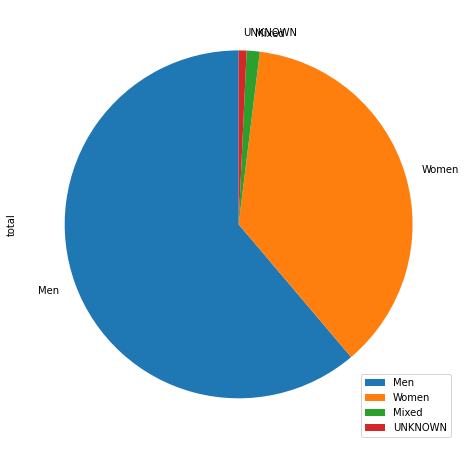

In [23]:
plot = df_gender.plot.pie(y='total', figsize=(8, 8), startangle = 90)
plt.savefig("images/circleplot_medal_by_gender")

## Redo PCA

In [24]:
features = ['gold', 'silver', 'bronze']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['class']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [25]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [26]:
finalDf = pd.concat([principalDf, data[['class']]], axis = 1)
finalDf

,principal component 1,principal component 2,class
0,2.762781,0.414137,1
1,1.916463,0.116402,1
2,0.264006,0.032206,1
3,6.607460,-0.723005,1
4,2.619494,-0.490901,1
...,...,...,...
110,-0.892508,0.038846,4
111,-0.887864,0.049559,4
112,-0.827351,0.011045,4
113,-0.872006,0.044356,4


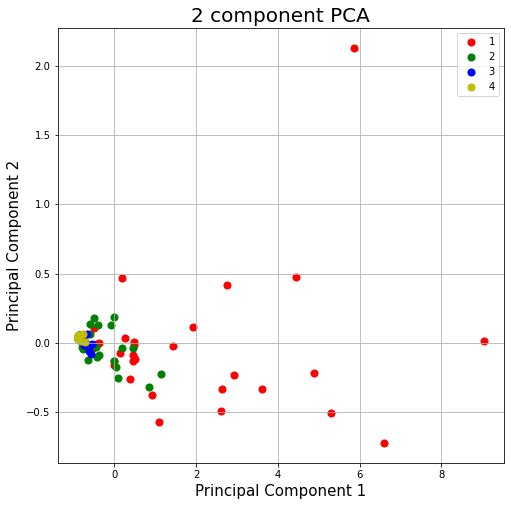

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['1', '2', '3','4']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.savefig("new images/pca_medal_by_class")

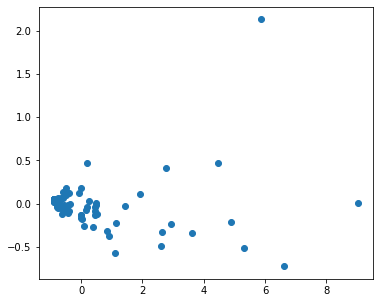

In [28]:
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'])
plt.rcParams['figure.figsize'] = (8, 6)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


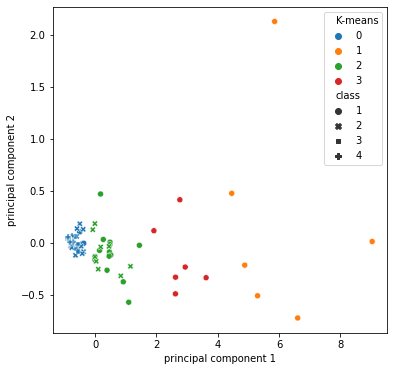

In [33]:
x = finalDf.iloc[:,0:2]
plt.rcParams["figure.figsize"] = (6,6)
cls = KMeans(n_clusters=4, init="random")
cls.fit(x)
labels_country = pd.Series(cls.labels_, name="K-means")
utils_pca.scatterplot_pca(data=x, hue=labels_country, style=finalDf["class"])
plt.savefig("new images/kmean_n=4_medal_by_class")